In [837]:
import numpy as np
import matplotlib.pyplot as plt

## Define the risk occurrence methods
* Triangular Distribution - Here the Probability of occurrence per year is the mode and the left and the right.
* Normal Distribution - The cyber threats is assumed to be in the range of 90% confidence level for the normal distribution that is why the formula can be used to calculate mean and std (Santini, P et.al, 2019)
$$
\mu = \frac{log(max\_value)+ log(min\_value)}{2} $$
$$\sigma =\frac{log(max\_value)- log(min\_value)}{3.29}
$$
* Poisson Distribution - The mean of the occurrence of the threat is used to calculate the values

In [838]:
def calculate_if_risk_occurs_triangular(attack_probability):
    probability = np.random.triangular(0, attack_probability, 1)
    return probability <= attack_probability

In [839]:
def calculate_if_risk_occurs_normal(lower, upper):
    mean = (np.log(lower) + np.log(upper)) / 2.0
    std_dv = (np.log(upper) - np.log(lower)) / 3.29

    return np.random.lognormal(mean, std_dv) <= mean

In [840]:
def calculate_if_risk_occurs_poisson(mean):
    return np.random.poisson(mean) <= mean

In [841]:
def get_loss_amount(lower, upper):
    mean = (np.log(lower) + np.log(upper)) / 2.0
    std_dv = (np.log(upper) - np.log(lower)) / 3.29
    return np.random.lognormal(mean, std_dv)

## Simulate total loss
This step simulates the probability of the cyber threat to occur and the probability of the loss after the threat happens. The threat is modeled using different probability distribution curves, however the cost of loss is modeled using log normal. (Santini, P et.al, 2019)

In [842]:
def simulate_risk_portfolio(risk):
    total_loss_amount = 0
    if risk["distribution"] == "triangular":
        if calculate_if_risk_occurs_triangular(risk["probability"]):
            total_loss_amount = get_loss_amount(risk["lower"], risk["upper"])
    elif risk["distribution"] == "normal":
        if calculate_if_risk_occurs_normal(risk["lower_occ"], risk["upper_occ"]):
            total_loss_amount = get_loss_amount(risk["lower"], risk["upper"])
    elif risk["distribution"] == "poisson":
        if calculate_if_risk_occurs_poisson(risk["mean"]):
            total_loss_amount = get_loss_amount(risk["lower"], risk["upper"])
    return total_loss_amount

In [843]:
def monte_carlo_simulation(cyber_risks, iterations):
    yearly_losses = []
    for i in range(iterations):
        loss_amount = simulate_risk_portfolio(cyber_risks)
        yearly_losses.append(loss_amount)
    return yearly_losses

### Method to plot exceedance curve
Two methods are created to plot the different loss exceedance probability curves.
```
calculate_loss_exceedance_prob()
calculate_loss_exceedance_prob_mitigated()
```


In [844]:
def calculate_loss_exceedance_prob(losses, risk, labels):
    losses_np = np.array(losses)
    sorted_losses = np.sort(losses_np[losses_np != 0])
    num_losses = len(sorted_losses)
    exceedance_probs = [((num_losses - i) / (num_losses + 1)*100 )for i in range(num_losses)]

    # Plot the loss exceedance curve
    plt.plot(sorted_losses, exceedance_probs)
    plt.ticklabel_format(style='plain', axis='x')
    plt.ticklabel_format(style='plain', axis='y')
    plt.xlabel(f'Loss for cyber risks in pounds')
    plt.ylabel('Exceedance Probability in %')
    plt.yticks(np.arange(0, 105, 5))
    plt.legend(labels=labels)
    plt.xlim(0, 200000)
    plt.title('Loss Exceedance Curve before mitigation')
    plt.grid(True)

In [845]:
def calculate_loss_exceedance_prob_mitigated(losses, risk, labels):
    losses_np = np.array(losses)
    sorted_losses = np.sort(losses_np[losses_np != 0])
    num_losses = len(sorted_losses)
    exceedance_probs = [((num_losses - i) / (num_losses + 1)*100 )for i in range(num_losses)]

    # Plot the loss exceedance curve
    plt.plot(sorted_losses, exceedance_probs)
    plt.ticklabel_format(style='plain', axis='x')
    plt.ticklabel_format(style='plain', axis='y')
    plt.xlabel(f'Loss for cyber risks in pounds')
    plt.ylabel('Exceedance Probability in %')
    plt.yticks(np.arange(0, 105, 5))
    plt.legend(labels=labels)
    plt.xlim(0, 200000)
    plt.title('Loss Exceedance Curve after mitigation')
    plt.grid(True)

In [846]:
# The method print the histogram for the loss vs the simulation number
def print_simulation_to_loss(losses, risk):
    no_of_simulations = np.arange(len(losses))
    plt.figure(figsize=(10, 10))

    plt.title(f'Monte-Carlo Simulation {risk}')
    plt.ylabel(f'Loss for {risk} in pounds')
    plt.xlabel(f'Simulation count')
    plt.plot(no_of_simulations, losses)
    plt.ticklabel_format(style='plain', axis='x')
    plt.ticklabel_format(style='plain', axis='y')
    plt.show()

In [847]:
risks = [{
    "name": "DDoS",
    "probability": 0.2,
    "lower": 10000,
    "upper": 227308,
    "xlim": 247308,
    "xticks": 30000,
    "distribution": "triangular"
},
{
    "name": "DoS",
    "upper_occ": 130,
    "lower_occ": 0.5,
    "lower": 1000,
    "upper": 133638,
    "xlim": 133638,
    "xticks": 15000,
    "distribution": "normal"

},
{
    "name": "Configuration error",
    "probability": 0.5,
    "lower": 1000,
    "upper": 10000,
    "xlim": 133638,
    "xticks": 15000,
    "distribution": "triangular"

},
{
    "name": "Malware",
    "upper_occ": 79.14,
    "lower_occ": 1,
    "lower": 10000,
    "upper": 57000,
    "xlim": 57000,
    "xticks": 15000,
    "distribution": "normal"

},
{
    "name": "Ransomware",
    "upper_occ": 80,
    "lower_occ": 5,
    "lower": 1000,
    "upper": 133638,
    "xlim": 133638,
    "xticks": 15000,
    "distribution": "normal"

},
{
    "name": "Insider threat",
    "upper_occ": 40,
    "lower_occ": 2,
    "lower": 10000,
    "upper": 124000,
    "xlim": 124000,
    "xticks": 15000,
    "distribution": "normal"
},
{
    "name": "Phishing Attack",
    "upper_occ": 300,
    "lower_occ": 11,
    "lower": 10000,
    "upper": 224300,
    "xlim": 224300,
    "xticks": 15000,
    "distribution": "normal"
},
{
    "name": "Spam",
    "mean": 50,
    "lower": 500,
    "upper": 22430,
    "xlim": 22430,
    "xticks": 5000,
    "distribution": "poisson"
},
{
    "name": "Unauthorized access",
    "mean": 700,
    "lower": 500,
    "upper": 22430,
    "xlim": 22430,
    "xticks": 5000,
    "distribution": "poisson"
},
{
    "name": "Social engineering",
    "mean": 203,
    "lower": 500,
    "upper": 85434,
    "xlim": 22430,
    "xticks": 5000,
    "distribution": "poisson"
}
]

In [848]:
risks_mitigated = [{
    "name": "DDoS mitigated",
    "probability": 0.1,
    "lower": 10000,
    "upper": 227308,
    "xlim": 247308,
    "xticks": 30000,
    "distribution": "triangular"
},
{
    "name": "DoS mitigated",
    "upper_occ": 20,
    "lower_occ": 0.5,
    "lower": 1000,
    "upper": 10000,
    "xlim": 133638,
    "xticks": 15000,
    "distribution": "normal"

},
{
    "name": "Configuration error mitigated",
    "probability": 0.02,
    "lower": 1000,
    "upper": 133638,
    "xlim": 133638,
    "xticks": 15000,
    "distribution": "triangular"

},
{
    "name": "Malware mitigated",
    "upper_occ": 29.14,
    "lower_occ": 1,
    "lower": 10000,
    "upper": 57000,
    "xlim": 57000,
    "xticks": 15000,
    "distribution": "normal"
},
{
    "name": "Insider threat mitigated",
    "upper_occ": 10,
    "lower_occ": 2,
    "lower": 10000,
    "upper": 124000,
    "xlim": 124000,
    "xticks": 15000,
    "distribution": "normal"
},
{
    "name": "Phishing Attack mitigated",
    "upper_occ": 200,
    "lower_occ": 11,
    "lower": 10000,
    "upper": 224300,
    "xlim": 224300,
    "xticks": 15000,
    "distribution": "normal"
},
{
    "name": "Spam mitigated",
    "mean": 3,
    "lower": 500,
    "upper": 22430,
    "xlim": 22430,
    "xticks": 5000,
    "distribution": "poisson"
},
{
    "name": "Unauthorized access mitigated",
    "mean": 1,
    "lower": 500,
    "upper": 22430,
    "xlim": 22430,
    "xticks": 5000,
    "distribution": "poisson"
},
{
    "name": "Ransomware mitigated",
    "upper_occ": 30,
    "lower_occ": 5,
    "lower": 1000,
    "upper": 133638,
    "xlim": 133638,
    "xticks": 15000,
    "distribution": "normal"

},
{
    "name": "Social engineering mitigated",
    "mean": 40,
    "lower": 500,
    "upper": 85434,
    "xlim": 22430,
    "xticks": 5000,
    "distribution": "poisson"
}
]

In [849]:
def aggregate_loss_curves(loss_curves):
    max_loss_points = []
    for curve in loss_curves:
        max_loss_points.append(curve.max())

    sorted_max_loss_points = np.sort(max_loss_points)
    exceedance_probs = np.linspace(1, 0, len(sorted_max_loss_points))
    return sorted_max_loss_points, exceedance_probs

In [850]:
def simulate_risks_before_mitigation(risks, iterations, labels):
    total_costs_temp = np.zeros(iterations)
    for risk in risks:
        yearly_losses = monte_carlo_simulation(risk, iterations=iterations)
        labels.append(risk["name"])
        print(f' Avg loss for {risk["name"]} costs {sum(yearly_losses) / iterations}')
        calculate_loss_exceedance_prob(yearly_losses, risk, labels)
        yearly_losses_np = np.array(yearly_losses)
        total_costs_temp = np.add(total_costs_temp, yearly_losses_np)
    labels.append("Total")
    print(f' Avg loss for total costs {sum(total_costs_temp) / iterations}')
    return total_costs_temp

In [851]:
def simulate_risks_after_mitigation(risks_mitigated, iterations, labels):
    total_costs_mitigated_temp = np.zeros(iterations)
    for risk in risks_mitigated:
        yearly_losses = monte_carlo_simulation(risk, iterations=iterations)
        labels.append(risk["name"])
        print(f' Avg loss for {risk["name"]} costs {sum(yearly_losses) / iterations}')
        calculate_loss_exceedance_prob(yearly_losses, risk, labels)
        yearly_losses_np = np.array(yearly_losses)
        total_costs_mitigated_temp = np.add(total_costs_mitigated_temp, yearly_losses_np)
    labels.append("Total after mitigation")
    print(f' Avg loss for total costs after mitigation {sum(total_costs_mitigated_temp) / iterations}')
    return  total_costs_mitigated_temp

In [852]:
ITERATIONS = 10000

 Avg loss for DDoS costs 16290.54665652836
 Avg loss for DoS costs 7110.935784501297
 Avg loss for Configuration error costs 2030.7954059150215
 Avg loss for Malware costs 4045.7707067378356
 Avg loss for Ransomware costs 585.8474155092418
 Avg loss for Insider threat costs 3067.8952825396677
 Avg loss for Phishing Attack costs 381.47411222481503
 Avg loss for Spam costs 3608.839254205685
 Avg loss for Unauthorized access costs 3319.7311709309915
 Avg loss for Social engineering costs 11249.036922890757
 Avg loss for total costs 51690.87271198366


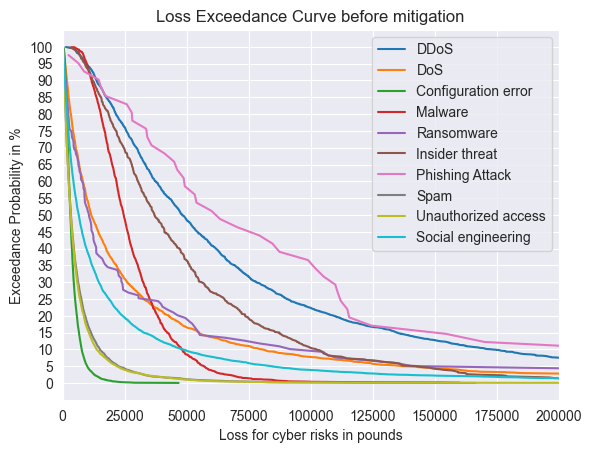

In [853]:
# Plot Loss Exceedance Curve for all the threats before and after mitigation
labels = []
total_costs = simulate_risks_before_mitigation(risks, ITERATIONS ,labels)
plt.show()

 Avg loss for DDoS mitigated costs 7276.845053996303
 Avg loss for DoS mitigated costs 735.4549274444572
 Avg loss for Configuration error mitigated costs 891.6126905058757
 Avg loss for Malware mitigated costs 3597.509718055979
 Avg loss for Insider threat mitigated costs 578.1380319752485
 Avg loss for Phishing Attack mitigated costs 91.10422817834932
 Avg loss for Spam mitigated costs 4126.559361391318
 Avg loss for Unauthorized access mitigated costs 4725.456662058351
 Avg loss for Ransomware mitigated costs 87.18043087029471
 Avg loss for Social engineering mitigated costs 12603.389429459075
 Avg loss for total costs after mitigation 34713.25053393503


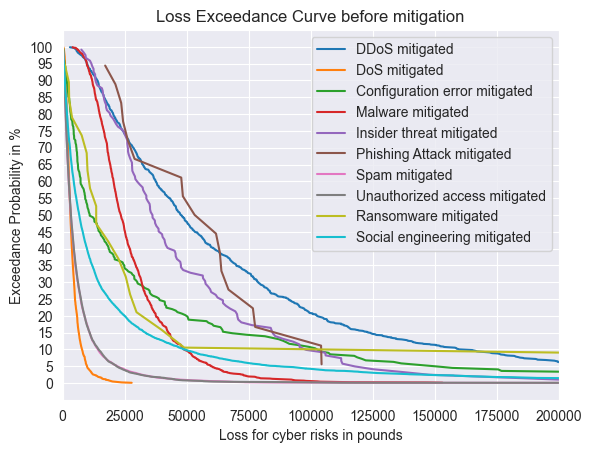

In [854]:
labels_new = []
total_costs_mitigated = simulate_risks_after_mitigation(risks_mitigated, ITERATIONS ,labels_new)
plt.show()

## Calculate loss exceedance for total risk
In this step the loss exceedance curve is plotted Total loss before mitigation and total loss after mitigation. With this graph one can compare the probability of total loss before after mitigation costs.

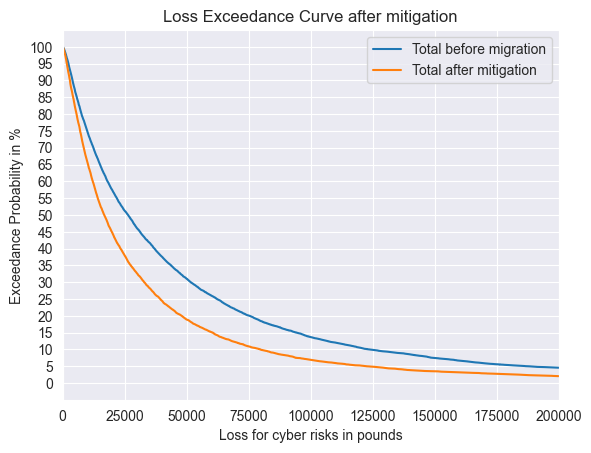

In [855]:
calculate_loss_exceedance_prob(total_costs, _, [])
calculate_loss_exceedance_prob_mitigated(total_costs_mitigated,_, ["Total before migration", "Total after mitigation"])
plt.show()

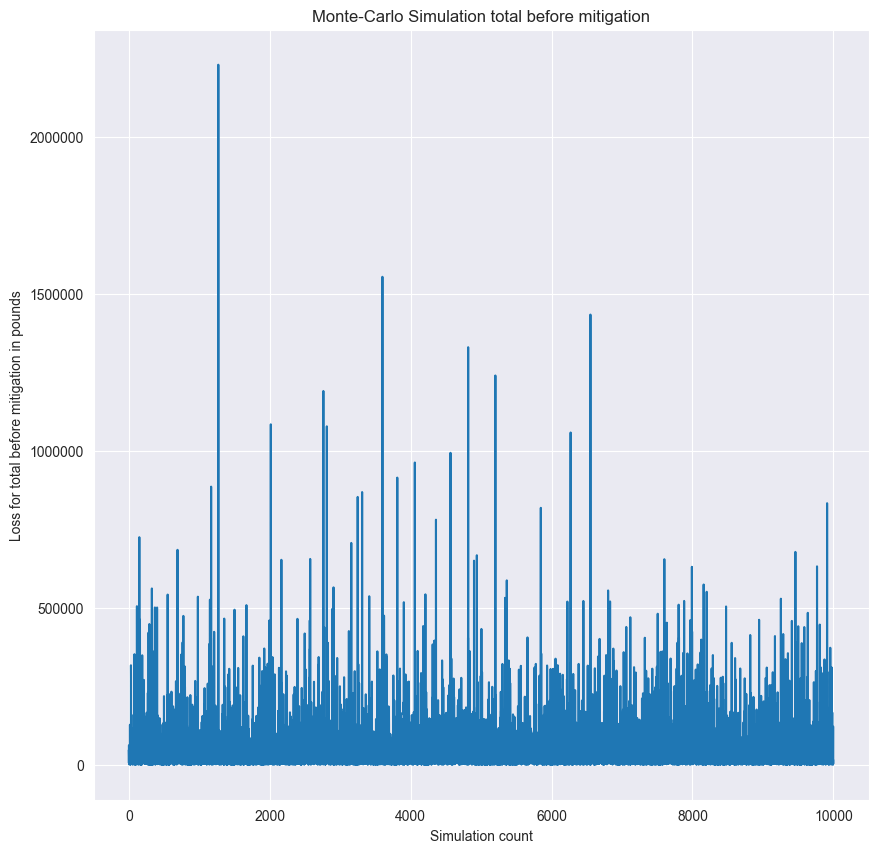

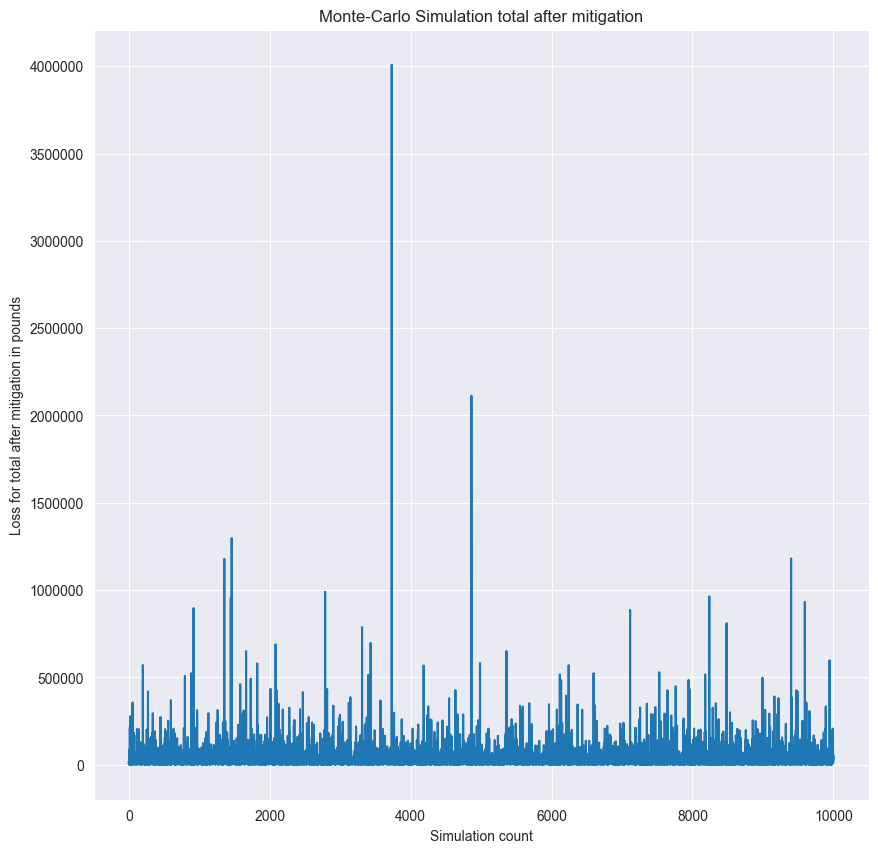

In [856]:
print_simulation_to_loss(total_costs, "total before mitigation")
plt.show()
print_simulation_to_loss(total_costs_mitigated, "total after mitigation")
plt.show()

## References
Santini, P., Gottardi, G., Baldi, M. and Chiaraluce, F., 2019. A data-driven approach to cyber risk assessment. Security and Communication Networks, 2019.